In [63]:
import pandas as pd
import matplotlib.pyplot as plt

alphas = [0.2, 0.4, 0.5, 0.6, 0.8]

df = pd.DataFrame()

for alpha in alphas:
    df_aux = pd.read_csv(f'data/tests_{alpha}.csv')
    df['problem'] = df_aux['problem']
    df['optimal'] = df_aux['optimal'].astype(int)
    df[f'time_{alpha}'] = df_aux['time']
    df[f'cost_{alpha}'] = df_aux['cost']
    df[f'gap_{alpha}'] = (df_aux['cost'] - df_aux['optimal'])/df_aux['optimal']

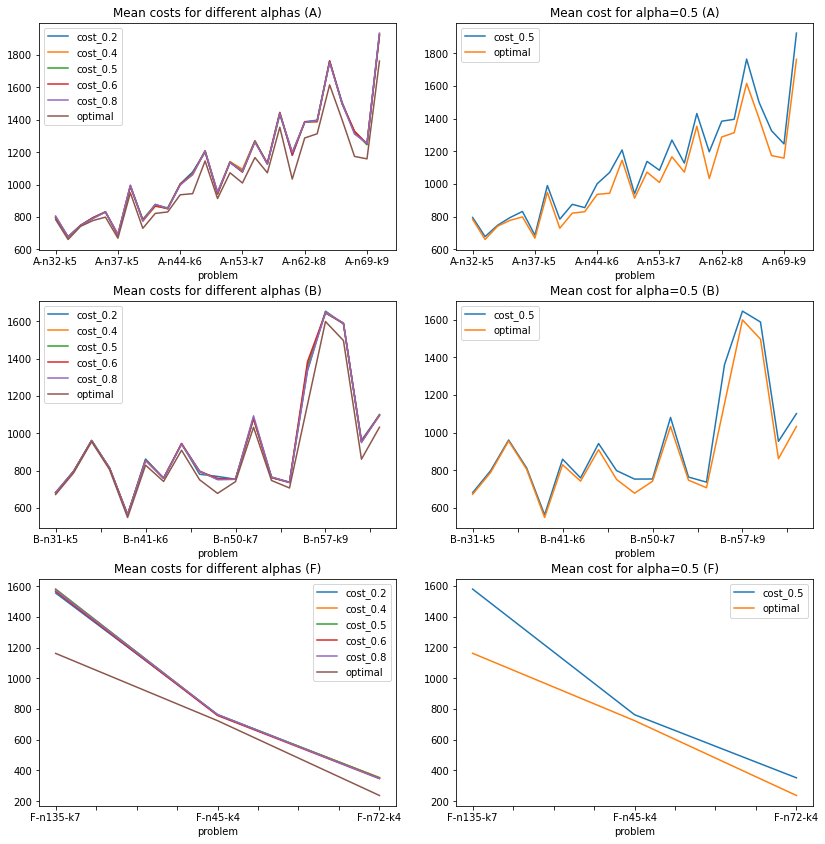

In [64]:
fig, ax = plt.subplots(ncols=2, nrows=3, figsize=(12, 12));
fig. tight_layout(pad=3.0)

mean_costs = df.groupby(['problem'], as_index=False).mean()[['problem', 'cost_0.2', 'cost_0.4', 'cost_0.5', 'cost_0.6', 'cost_0.8', 'optimal']]

for i,problem in enumerate(['A', 'B', 'F']):
    ax[i][0].set_title(f"Mean costs for different alphas ({problem})")
    ax[i][1].set_title(f"Mean cost for alpha=0.5 ({problem})")

    mean_costs_p = mean_costs[mean_costs['problem'].str.contains(problem)]
    mean_costs_p.plot(x="problem", ax=ax[i][0], legend=True);
    mean_costs_p[['problem', 'cost_0.5', 'optimal']].plot(x="problem", ax=ax[i][1], legend=True);


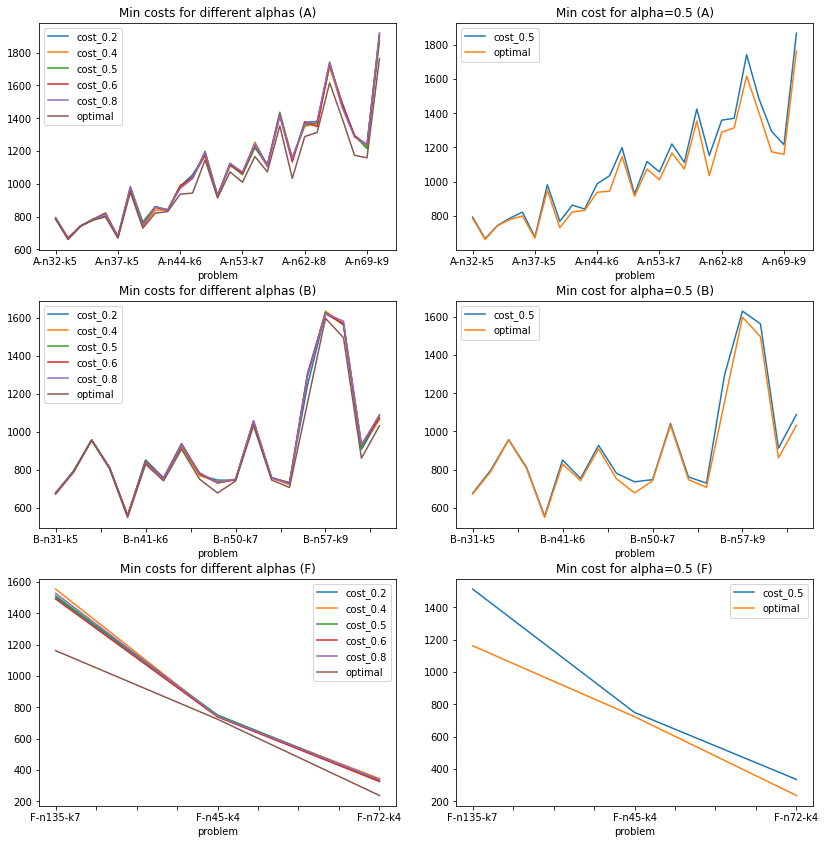

In [65]:
fig, ax = plt.subplots(ncols=2, nrows=3, figsize=(12, 12));
fig. tight_layout(pad=3.0)

min_costs = df.groupby(['problem'], as_index=False).min()[['problem', 'cost_0.2', 'cost_0.4', 'cost_0.5', 'cost_0.6', 'cost_0.8', 'optimal']]

for i,problem in enumerate(['A', 'B', 'F']):
    ax[i][0].set_title(f"Min costs for different alphas ({problem})")
    ax[i][1].set_title(f"Min cost for alpha=0.5 ({problem})")

    min_costs_p = min_costs[min_costs['problem'].str.contains(problem)]
    min_costs_p.plot(x="problem", ax=ax[i][0], legend=True);
    min_costs_p[['problem', 'cost_0.5', 'optimal']].plot(x="problem", ax=ax[i][1], legend=True);

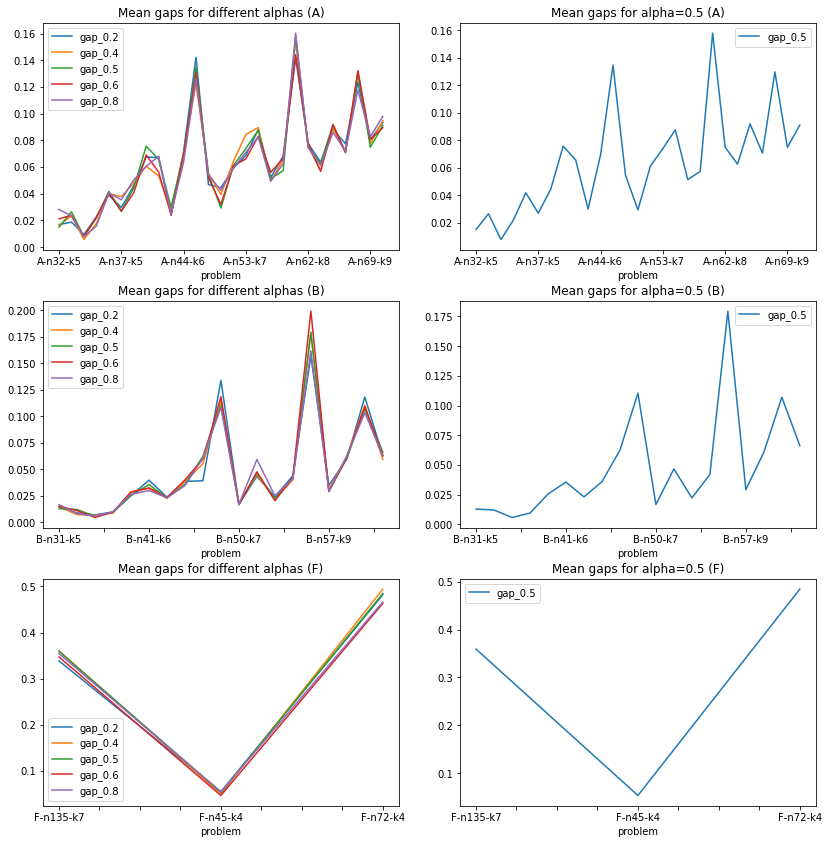

In [66]:
fig, ax = plt.subplots(ncols=2, nrows=3, figsize=(12, 12));
fig. tight_layout(pad=3.0)

mean_gaps = df.groupby(['problem'], as_index=False).mean()[['problem', 'gap_0.2', 'gap_0.4', 'gap_0.5', 'gap_0.6', 'gap_0.8']]

for i,problem in enumerate(['A', 'B', 'F']):
    ax[i][0].set_title(f"Mean gaps for different alphas ({problem})")
    ax[i][1].set_title(f"Mean gaps for alpha=0.5 ({problem})")

    mean_gaps_p = mean_gaps[mean_gaps['problem'].str.contains(problem)]
    mean_gaps_p.plot(x="problem", ax=ax[i][0], legend=True);
    mean_gaps_p[['problem', 'gap_0.5']].plot(x="problem", ax=ax[i][1], legend=True);

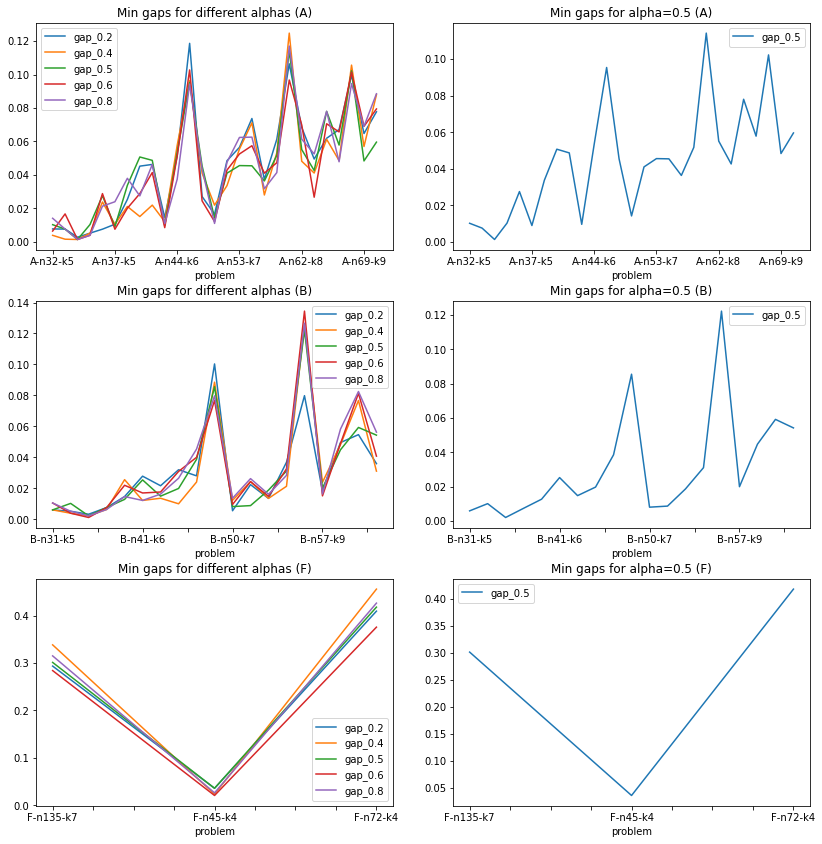

In [67]:
fig, ax = plt.subplots(ncols=2, nrows=3, figsize=(12, 12));
fig. tight_layout(pad=3.0)

min_gaps = df.groupby(['problem'], as_index=False).min()[['problem', 'gap_0.2', 'gap_0.4', 'gap_0.5', 'gap_0.6', 'gap_0.8']]

for i,problem in enumerate(['A', 'B', 'F']):
    ax[i][0].set_title(f"Min gaps for different alphas ({problem})")
    ax[i][1].set_title(f"Min gaps for alpha=0.5 ({problem})")

    min_gaps_p = min_gaps[min_gaps['problem'].str.contains(problem)]
    min_gaps_p.plot(x="problem", ax=ax[i][0], legend=True);
    min_gaps_p[['problem', 'gap_0.5']].plot(x="problem", ax=ax[i][1], legend=True);

In [68]:
alpha = 0.5
mean = df.groupby(['problem'])[[f'optimal', f'cost_{alpha}', f'time_{alpha}', f'gap_{alpha}']].mean().set_axis(['optimal', 'mean_cost', 'mean_time', 'mean_gap'], axis=1)
min = df.groupby(['problem'])[[f'cost_{alpha}', f'time_{alpha}', f'gap_{alpha}']].min().set_axis(['min_cost', 'min_time', 'min_gap'], axis=1)
results = pd.DataFrame()
results = pd.concat([results, mean, min], axis=1)
results = results[['optimal', 'min_cost', 'mean_cost', 'min_gap', 'mean_gap', 'min_time', 'mean_time']]
results['optimal'] = results['optimal'].astype(int)
results

,optimal,min_cost,mean_cost,min_gap,mean_gap,min_time,mean_time
problem,,,,,,,
A-n32-k5,784,792,795.750,0.010204,0.014987,1.55074,1.583135
A-n33-k5,661,666,678.500,0.007564,0.026475,1.68712,1.713555
A-n33-k6,742,743,747.750,0.001348,0.007749,2.13118,2.218043
A-n34-k5,778,786,795.000,0.010283,0.021851,1.70636,1.731280
A-n36-k5,799,821,832.375,0.027534,0.041771,1.76401,1.781111
A-n37-k5,669,675,687.000,0.008969,0.026906,1.77998,1.792080
A-n37-k6,949,981,991.125,0.033720,0.044389,2.40665,2.476122
A-n38-k5,730,767,785.250,0.050685,0.075685,1.92001,1.956005
A-n39-k5,822,862,876.000,0.048662,0.065693,1.96003,1.978303


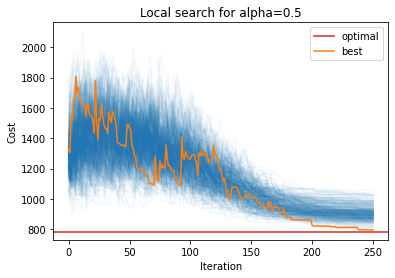

In [69]:
import numpy as np

local_search = pd.read_csv('data/local_search.csv', sep=';', header=None).fillna(method='ffill', axis=1).transpose().astype(int)
fig, ax = plt.subplots();

local_search.plot(ax=ax, color='tab:blue', alpha=0.05, legend=None);
last_index = local_search.transpose().columns[-1]
local_search.transpose()[local_search.transpose()[last_index] == local_search.transpose()[last_index].min()].transpose().plot(ax=ax, color='tab:orange', label='best')
ax.axhline(y=784, color='tab:red', label='optimal');

handles, labels = ax.get_legend_handles_labels();
ax.legend(reversed(handles), ['optimal', 'best'], loc='best');
ax.set_title("Local search for alpha=0.5");
ax.set_xlabel("Iteration");
ax.set_ylabel("Cost");
